In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools
import datetime
import os
import geopy
import calendar

import cartopy

% matplotlib inline

In [2]:
year_start = 1979
year_end = 2016

ys_str = str(year_start+1)
ye_str = str(year_end-1)

In [3]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [4]:
states_shapes = cartopy.io.shapereader.natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')
shapes_reader = cartopy.io.shapereader.Reader(states_shapes)

states_name_list = numpy.array(([i.attributes['name'] for i in shapes_reader.records()]))
for i in shapes_reader.records():
    if i.attributes['name']=='California' and i.attributes['iso_a2']=='US':
        CA_object = i
CA_object_no_islands = CA_object.geometry.geoms[-1] # get the last one (the state of Cali)

# open seasonal totals from LENS

In [5]:
hist_rcp_filename = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calcs_and_plots/create_ncfiles_seasonal/seasonal_totals_hist_rcp.nc'

hist_rcp_ncfile = netCDF4.Dataset(hist_rcp_filename)
hist_rcp_data = hist_rcp_ncfile.variables['seasonal_total']
hist_rcp_time_var = hist_rcp_ncfile.variables['time']
hist_rcp_time = hist_rcp_time_var[:]
PRECT_lat = hist_rcp_ncfile.variables['lat'][:]
PRECT_lon = hist_rcp_ncfile.variables['lon'][:]

time_datetimes = netCDF4.num2date(hist_rcp_time, hist_rcp_time_var.units, 'standard')
time_datetimes_subset = [t.year in range(year_start,year_end+1) for t in time_datetimes]
hist_rcp_data = hist_rcp_data[time_datetimes_subset,:,:,:]
time_datetimes = time_datetimes[time_datetimes_subset]

In [6]:
LA_lat_idx = geo_idx(LA_lat, PRECT_lat)
LA_lon_idx = geo_idx(LA_lon, PRECT_lon)

SF_lat_idx = geo_idx(SF_lat, PRECT_lat)
SF_lon_idx = geo_idx(SF_lon, PRECT_lon)

OD_lat_idx = geo_idx(Oroville_dam_lat, PRECT_lat)
OD_lon_idx = geo_idx(Oroville_dam_lon, PRECT_lon)

#REGION_lat_idx, REGION_lon_idx = SF_lat_idx, SF_lon_idx; REGION_NAME = 'SF'
REGION_lat_idx, REGION_lon_idx = LA_lat_idx, LA_lon_idx; REGION_NAME = 'LA'
#REGION_lat_idx, REGION_lon_idx = OD_lat_idx, OD_lon_idx; REGION_NAME = 'OD'

In [7]:
latlon_combos_lens = numpy.array((list(itertools.product(range(PRECT_lat.size),range(PRECT_lon.size))) ))

In [8]:
import geopy.distance

dist=300

# FOR LOS ANGELES
lat0,lon0 = PRECT_lat[LA_lat_idx],PRECT_lon[LA_lon_idx]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos_lens.__len__()):
    lat_new,lon_new = PRECT_lat[latlon_combos_lens[latlon][0]], -(360-PRECT_lon[latlon_combos_lens[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_lens_300km = distance_array_ledist.reshape((PRECT_lat.size,PRECT_lon.size))


# FOR SAN FRANCISCO
lat0,lon0 = PRECT_lat[SF_lat_idx],PRECT_lon[SF_lon_idx]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos_lens.__len__()):
    lat_new,lon_new = PRECT_lat[latlon_combos_lens[latlon][0]], -(360-PRECT_lon[latlon_combos_lens[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_lens_300km = distance_array_ledist.reshape((PRECT_lat.size,PRECT_lon.size))

In [9]:
import geopy.distance

dist=200

# FOR LOS ANGELES
lat0,lon0 = PRECT_lat[LA_lat_idx],PRECT_lon[LA_lon_idx]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos_lens.__len__()):
    lat_new,lon_new = PRECT_lat[latlon_combos_lens[latlon][0]], -(360-PRECT_lon[latlon_combos_lens[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_lens_200km = distance_array_ledist.reshape((PRECT_lat.size,PRECT_lon.size))


# FOR SAN FRANCISCO
lat0,lon0 = PRECT_lat[SF_lat_idx],PRECT_lon[SF_lon_idx]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos_lens.__len__()):
    lat_new,lon_new = PRECT_lat[latlon_combos_lens[latlon][0]], -(360-PRECT_lon[latlon_combos_lens[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_lens_200km = distance_array_ledist.reshape((PRECT_lat.size,PRECT_lon.size))

In [10]:
import geopy.distance

dist=110

# FOR LOS ANGELES
lat0,lon0 = PRECT_lat[LA_lat_idx],PRECT_lon[LA_lon_idx]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos_lens.__len__()):
    lat_new,lon_new = PRECT_lat[latlon_combos_lens[latlon][0]], -(360-PRECT_lon[latlon_combos_lens[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_lens_110km = distance_array_ledist.reshape((PRECT_lat.size,PRECT_lon.size))


# FOR SAN FRANCISCO
lat0,lon0 = PRECT_lat[SF_lat_idx],PRECT_lon[SF_lon_idx]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos_lens.__len__()):
    lat_new,lon_new = PRECT_lat[latlon_combos_lens[latlon][0]], -(360-PRECT_lon[latlon_combos_lens[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_lens_110km = distance_array_ledist.reshape((PRECT_lat.size,PRECT_lon.size))

# open precip from GPCP

In [11]:
gpcp_filename = '/Users/baird/Dropbox/_data_observations/GPCP/precip.mon.mean.nc'
gpcp_ncfile = netCDF4.Dataset(gpcp_filename)
gpcp_data = gpcp_ncfile.variables['precip'][:]
lat_gpcp = gpcp_ncfile.variables['lat'][:]
lon_gpcp = gpcp_ncfile.variables['lon'][:]
gpcp_time_var = gpcp_ncfile.variables['time']
gpcp_time_data = gpcp_time_var[:]

gpcp_time_datetimes = netCDF4.num2date(gpcp_time_data, gpcp_time_var.units, 'standard')
gpcp_time_datetimes_subset = [t.year in range(year_start,year_end+1) for t in gpcp_time_datetimes]
gpcp_data = gpcp_data[gpcp_time_datetimes_subset,:,:]
gpcp_time_datetimes = gpcp_time_datetimes[gpcp_time_datetimes_subset]

In [12]:
# calculate number of days in each gpcp month
month_range = numpy.array(( [calendar.monthrange(t.year,t.month)[1] for t in gpcp_time_datetimes ]))
for j in range(gpcp_data.shape[1]):
    for k in range(gpcp_data.shape[2]):
        gpcp_data[:,j,k] = gpcp_data[:,j,k]*month_range

In [13]:
# pick out NDJFM for full years...
NDJFM_indices_gpcp = numpy.array(([t.month in [11,12,1,2,3] for t in gpcp_time_datetimes]), dtype=bool)
NDJFM_indices_gpcp[0:3]=False
NDJFM_indices_gpcp[-2::]=False

J_indices_gpcp = numpy.array(([t.month in [1] for t in gpcp_time_datetimes]), dtype=bool)
J_indices_gpcp[0]=False

In [14]:
gpcp_data_copy = numpy.copy(gpcp_data)
#half_index = int(cruts_data_copy.shape[2]/2)
#cruts_data_copy[:,:,0:half_index]=cruts_data[:,:,half_index::]
#cruts_data_copy[:,:,half_index::]=cruts_data[:,:,0:half_index]

In [15]:
gpcp_data_subset = gpcp_data_copy[:,(lat_gpcp>=PRECT_lat.min())&(lat_gpcp<=PRECT_lat.max()),:]
gpcp_data_subset = gpcp_data_subset[:,:,(lon_gpcp>=PRECT_lon.min())&(lon_gpcp<=PRECT_lon.max())]
lon_gpcp_subset = lon_gpcp[(lon_gpcp>=PRECT_lon.min())&(lon_gpcp<=PRECT_lon.max())]
lat_gpcp_subset = lat_gpcp[(lat_gpcp>=PRECT_lat.min())&(lat_gpcp<=PRECT_lat.max())]

In [16]:
n_seasons = gpcp_time_datetimes[-1].year - gpcp_time_datetimes[0].year

In [17]:
gpcp_seasonal_totals_array = numpy.zeros((n_seasons,gpcp_data_subset.shape[1],gpcp_data_subset.shape[2]))

In [18]:
gpcp_seasonal_totals_array_allvals = numpy.zeros((gpcp_data_subset.shape))
gpcp_data_subset_nanmonths = numpy.copy(gpcp_data_subset)
gpcp_data_subset_nanmonths[NDJFM_indices_gpcp==False,:,:] = numpy.nan
for j in range(lat_gpcp_subset.size):
    for k in range(lon_gpcp_subset.size):
        gpcp_seasonal_totals_array_allvals[:,j,k] = pandas.Series(gpcp_data_subset_nanmonths[:,j,k]).rolling(window=5, center=True).sum()

# subset all non-nan values (should come out to 115 time periods, or n_seasons)
gpcp_seasonal_totals_array = gpcp_seasonal_totals_array_allvals[J_indices_gpcp,:,:]

In [19]:
latlon_combos = numpy.array((list(itertools.product(range(lat_gpcp_subset.size),range(lon_gpcp_subset.size))) ))
# choose grid boxes closest to LA / Southern California
nanvals_flattened = numpy.copy(gpcp_seasonal_totals_array[0,:,:].reshape(-1))
nanvals_flattened[~numpy.isnan(nanvals_flattened)] = 1
valid_indices = numpy.where(~numpy.isnan(nanvals_flattened))[0]

In [20]:
LA_lat_idx_gpcp = geo_idx(LA_lat, lat_gpcp_subset)
LA_lon_idx_gpcp = geo_idx(LA_lon, lon_gpcp_subset)

SF_lat_idx_gpcp = geo_idx(SF_lat, lat_gpcp_subset)
SF_lon_idx_gpcp = geo_idx(SF_lon, lon_gpcp_subset)

OD_lat_idx_gpcp = geo_idx(Oroville_dam_lat, lat_gpcp_subset)
OD_lon_idx_gpcp = geo_idx(Oroville_dam_lon, lon_gpcp_subset)

In [21]:
import geopy.distance

dist=110

# FOR LOS ANGELES
lat0,lon0 = lat_gpcp_subset[LA_lat_idx_gpcp],lon_gpcp_subset[LA_lon_idx_gpcp]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_gpcp_subset[latlon_combos[latlon][0]], -(360-lon_gpcp_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_gpcp_110km = distance_array_ledist.reshape((lat_gpcp_subset.size,lon_gpcp_subset.size))


# FOR SAN FRANCISCO
lat0,lon0 = lat_gpcp_subset[SF_lat_idx_gpcp],lon_gpcp_subset[SF_lon_idx_gpcp]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_gpcp_subset[latlon_combos[latlon][0]], -(360-lon_gpcp_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_gpcp_110km = distance_array_ledist.reshape((lat_gpcp_subset.size,lon_gpcp_subset.size))

In [22]:
import geopy.distance

dist=200

# FOR LOS ANGELES
lat0,lon0 = lat_gpcp_subset[LA_lat_idx_gpcp],lon_gpcp_subset[LA_lon_idx_gpcp]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_gpcp_subset[latlon_combos[latlon][0]], -(360-lon_gpcp_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_gpcp_200km = distance_array_ledist.reshape((lat_gpcp_subset.size,lon_gpcp_subset.size))


# FOR SAN FRANCISCO
lat0,lon0 = lat_gpcp_subset[SF_lat_idx_gpcp],lon_gpcp_subset[SF_lon_idx_gpcp]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_gpcp_subset[latlon_combos[latlon][0]], -(360-lon_gpcp_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_gpcp_200km = distance_array_ledist.reshape((lat_gpcp_subset.size,lon_gpcp_subset.size))

In [23]:
import geopy.distance

dist=300

# FOR LOS ANGELES
lat0,lon0 = lat_gpcp_subset[LA_lat_idx_gpcp],lon_gpcp_subset[LA_lon_idx_gpcp]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_gpcp_subset[latlon_combos[latlon][0]], -(360-lon_gpcp_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_gpcp_300km = distance_array_ledist.reshape((lat_gpcp_subset.size,lon_gpcp_subset.size))


# FOR SAN FRANCISCO
lat0,lon0 = lat_gpcp_subset[SF_lat_idx_gpcp],lon_gpcp_subset[SF_lon_idx_gpcp]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_gpcp_subset[latlon_combos[latlon][0]], -(360-lon_gpcp_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_gpcp_300km = distance_array_ledist.reshape((lat_gpcp_subset.size,lon_gpcp_subset.size))

# open precip from CRU TS

In [35]:
cruts_filename = '/Users/baird/Dropbox/_analysis/attribution_2017/obs/CRU_TS/cru_ts4.01.1901.2016.pre.dat_ORIG.nc'
cruts_ncfile = netCDF4.Dataset(cruts_filename)
cruts_data = cruts_ncfile.variables['pre'][:]
lon_cruts = cruts_ncfile.variables['lon'][:]+180.
lat_cruts = cruts_ncfile.variables['lat'][:]
cruts_time_var = cruts_ncfile.variables['time']
cruts_time_data = cruts_time_var[:]

cruts_time_datetimes = netCDF4.num2date(cruts_time_data, cruts_time_var.units, 'standard')
cruts_time_datetimes_subset = [t.year in range(year_start,year_end+1) for t in cruts_time_datetimes]
cruts_data = cruts_data[cruts_time_datetimes_subset,:,:]
cruts_time_datetimes = cruts_time_datetimes[cruts_time_datetimes_subset]

In [37]:
cruts_data_copy = numpy.copy(cruts_data)
half_index = int(cruts_data_copy.shape[2]/2)
cruts_data_copy[:,:,0:half_index]=cruts_data[:,:,half_index::]
cruts_data_copy[:,:,half_index::]=cruts_data[:,:,0:half_index]

In [38]:
cruts_data_copy[cruts_data_copy<=0.1]=0.0

In [39]:
cruts_data_copy[cruts_data_copy==9.96920997e36]=numpy.nan

In [40]:
# pick out NDJFM for full years...
NDJFM_indices_cruts = numpy.array(([t.month in [11,12,1,2,3] for t in cruts_time_datetimes]), dtype=bool)
NDJFM_indices_cruts[0:3]=False
NDJFM_indices_cruts[-2::]=False

J_indices_cruts = numpy.array(([t.month in [1] for t in cruts_time_datetimes]), dtype=bool)
J_indices_cruts[0]=False

In [41]:
cruts_data_subset = cruts_data_copy[:,(lat_cruts>=PRECT_lat.min())&(lat_cruts<=PRECT_lat.max()),:]
cruts_data_subset = cruts_data_subset[:,:,(lon_cruts>=PRECT_lon.min())&(lon_cruts<=PRECT_lon.max())]
lon_cruts_subset = lon_cruts[(lon_cruts>=PRECT_lon.min())&(lon_cruts<=PRECT_lon.max())]
lat_cruts_subset = lat_cruts[(lat_cruts>=PRECT_lat.min())&(lat_cruts<=PRECT_lat.max())]

# calculate seasonal totals

In [42]:
n_seasons = cruts_time_datetimes[-1].year - cruts_time_datetimes[0].year

In [43]:
cruts_seasonal_totals_array = numpy.zeros((n_seasons,cruts_data_subset.shape[1],cruts_data_subset.shape[2]))

In [44]:
cruts_seasonal_totals_array_allvals = numpy.zeros((cruts_data_subset.shape))
cruts_data_subset_nanmonths = numpy.copy(cruts_data_subset)
cruts_data_subset_nanmonths[NDJFM_indices_cruts==False,:,:] = numpy.nan
for j in range(lat_cruts_subset.size):
    for k in range(lon_cruts_subset.size):
        cruts_seasonal_totals_array_allvals[:,j,k] = pandas.Series(cruts_data_subset_nanmonths[:,j,k]).rolling(window=5, center=True).sum()

# subset all non-nan values (should come out to 115 time periods, or n_seasons)
cruts_seasonal_totals_array = cruts_seasonal_totals_array_allvals[J_indices_cruts,:,:]

In [45]:
latlon_combos = numpy.array((list(itertools.product(range(lat_cruts_subset.size),range(lon_cruts_subset.size))) ))
# choose grid boxes closest to LA / Southern California
lat,lon = lat_cruts_subset[latlon_combos[2000][0]], lon_cruts_subset[latlon_combos[2000][1]]
nanvals_flattened = numpy.copy(cruts_seasonal_totals_array[0,:,:].reshape(-1))
nanvals_flattened[~numpy.isnan(nanvals_flattened)] = 1
valid_indices = numpy.where(~numpy.isnan(nanvals_flattened))[0]

In [46]:
LA_lat_idx_cruts = geo_idx(LA_lat, lat_cruts_subset)
LA_lon_idx_cruts = geo_idx(LA_lon, lon_cruts_subset)

SF_lat_idx_cruts = geo_idx(SF_lat, lat_cruts_subset)
SF_lon_idx_cruts = geo_idx(SF_lon, lon_cruts_subset)

OD_lat_idx_cruts = geo_idx(Oroville_dam_lat, lat_cruts_subset)
OD_lon_idx_cruts = geo_idx(Oroville_dam_lon, lon_cruts_subset)

In [47]:
import geopy.distance

dist=110

# FOR LOS ANGELES
lat0,lon0 = lat_cruts_subset[LA_lat_idx_cruts],lon_cruts_subset[LA_lon_idx_cruts]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_cruts_subset[latlon_combos[latlon][0]], -(360-lon_cruts_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_cruts_110km = distance_array_ledist.reshape((lat_cruts_subset.size,lon_cruts_subset.size))


# FOR SAN FRANCISCO
lat0,lon0 = lat_cruts_subset[SF_lat_idx_cruts],lon_cruts_subset[SF_lon_idx_cruts]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_cruts_subset[latlon_combos[latlon][0]], -(360-lon_cruts_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_cruts_110km = distance_array_ledist.reshape((lat_cruts_subset.size,lon_cruts_subset.size))

In [48]:
import geopy.distance

dist=200

# FOR LOS ANGELES
lat0,lon0 = lat_cruts_subset[LA_lat_idx_cruts],lon_cruts_subset[LA_lon_idx_cruts]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_cruts_subset[latlon_combos[latlon][0]], -(360-lon_cruts_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_cruts_200km = distance_array_ledist.reshape((lat_cruts_subset.size,lon_cruts_subset.size))


# FOR SAN FRANCISCO
lat0,lon0 = lat_cruts_subset[SF_lat_idx_cruts],lon_cruts_subset[SF_lon_idx_cruts]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_cruts_subset[latlon_combos[latlon][0]], -(360-lon_cruts_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_cruts_200km = distance_array_ledist.reshape((lat_cruts_subset.size,lon_cruts_subset.size))

In [49]:
import geopy.distance

dist=300

# FOR LOS ANGELES
lat0,lon0 = lat_cruts_subset[LA_lat_idx_cruts],lon_cruts_subset[LA_lon_idx_cruts]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_cruts_subset[latlon_combos[latlon][0]], -(360-lon_cruts_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_LA_2d_cruts_300km = distance_array_ledist.reshape((lat_cruts_subset.size,lon_cruts_subset.size))


# FOR SAN FRANCISCO
lat0,lon0 = lat_cruts_subset[SF_lat_idx_cruts],lon_cruts_subset[SF_lon_idx_cruts]
point0 = (lat0,-(360-lon0))

distance_list = []
for latlon in range(latlon_combos.__len__()):
    lat_new,lon_new = lat_cruts_subset[latlon_combos[latlon][0]], -(360-lon_cruts_subset[latlon_combos[latlon][1]])
    distance_list.append( geopy.distance.vincenty(point0, (lat_new,lon_new)).km )
distance_array = numpy.array(distance_list)
distance_array_ledist = numpy.copy(distance_array)
distance_array_ledist[distance_array>dist]=numpy.nan
distance_array_ledist[distance_array<=dist]=1
distance_array_SF_2d_cruts_300km = distance_array_ledist.reshape((lat_cruts_subset.size,lon_cruts_subset.size))

# Get landmask for CRU TS

# Get landmask for LENS

In [50]:
landmask_file = '/Users/baird/Dropbox/Precipitation Extremes Project/Whiplash_manuscript/topography_LENS/USGS-gtopo30_0.9x1.25_remap_c051027.nc'
landmask_ncfile = netCDF4.Dataset(landmask_file)
landfrac = landmask_ncfile.variables['LANDFRAC'][:]
landfrac_lat = landmask_ncfile.variables['lat'][:]
landfrac_lon = landmask_ncfile.variables['lon'][:]

In [51]:
landfrac_lat_subset = (landfrac_lat<=PRECT_lat.max()) & (landfrac_lat>=(PRECT_lat.min()-0.5))
landfrac_lon_subset = (landfrac_lon<=PRECT_lon.max()) & (landfrac_lon>=PRECT_lon.min())

In [52]:
landfrac_subset = landfrac[landfrac_lat_subset,:]
landfrac_subset = landfrac_subset[:,landfrac_lon_subset]
landfrac_nanvals = numpy.ones(landfrac_subset.shape)
landfrac_nanvals[landfrac_subset==0] = numpy.nan
landfrac_nanvals[landfrac_nanvals>0] = 1

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


# Get landmask for GPCP

In [53]:
landmask_file = '/Users/baird/Dropbox/_analysis/obs_analysis/OBS_landfrac_oceanfrac_2.5x2.5.nc'
landmask_ncfile = netCDF4.Dataset(landmask_file)
landsea = landmask_ncfile.variables['landsea_int'][:]
landsea_lat = landmask_ncfile.variables['lat'][:]
landsea_lon = landmask_ncfile.variables['lon'][:]

In [54]:
landsea_lat_subset = (landsea_lat<=PRECT_lat.max()+10) & (landsea_lat>=(PRECT_lat.min()-10))
landsea_lon_subset = (landsea_lon<=PRECT_lon.max()+10) & (landsea_lon>=PRECT_lon.min()-10)

In [55]:
landsea_subset = landsea[landsea_lat_subset,:]
landsea_subset = landsea_subset[:,landsea_lon_subset]
landsea_nanvals = numpy.ones(landsea_subset.shape)
landsea_nanvals[landsea_subset==0] = numpy.nan
landsea_nanvals[landsea_nanvals>0] = 1

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


# pool means from the appropriate regions

# for LENS data

In [56]:
collect_LA_lens_totals_110km = hist_rcp_data*distance_array_LA_2d_lens_110km*landfrac_nanvals
collect_SF_lens_totals_110km = hist_rcp_data*distance_array_SF_2d_lens_110km*landfrac_nanvals

area_mean_LA_lens_totals_110km = numpy.nanmean(collect_LA_lens_totals_110km, axis=(2,3)).reshape(-1)
area_mean_SF_lens_totals_110km = numpy.nanmean(collect_SF_lens_totals_110km, axis=(2,3)).reshape(-1)

#rand_int = numpy.random.randint(low=0,high=area_mean_LA_lens_totals.size,size=115)
rand_int = numpy.arange(area_mean_LA_lens_totals_110km.size)

area_mean_LA_lens_totals_110km = area_mean_LA_lens_totals_110km[rand_int]
area_mean_SF_lens_totals_110km = area_mean_SF_lens_totals_110km[rand_int]

In [57]:
collect_LA_lens_totals_200km = hist_rcp_data*distance_array_LA_2d_lens_200km*landfrac_nanvals
collect_SF_lens_totals_200km = hist_rcp_data*distance_array_SF_2d_lens_200km*landfrac_nanvals

area_mean_LA_lens_totals_200km = numpy.nanmean(collect_LA_lens_totals_200km, axis=(2,3)).reshape(-1)
area_mean_SF_lens_totals_200km = numpy.nanmean(collect_SF_lens_totals_200km, axis=(2,3)).reshape(-1)

#rand_int = numpy.random.randint(low=0,high=area_mean_LA_lens_totals.size,size=115)

area_mean_LA_lens_totals_200km = area_mean_LA_lens_totals_200km[rand_int]
area_mean_SF_lens_totals_200km = area_mean_SF_lens_totals_200km[rand_int]

In [58]:
collect_LA_lens_totals_300km = hist_rcp_data*distance_array_LA_2d_lens_300km*landfrac_nanvals
collect_SF_lens_totals_300km = hist_rcp_data*distance_array_SF_2d_lens_300km*landfrac_nanvals

area_mean_LA_lens_totals_300km = numpy.nanmean(collect_LA_lens_totals_300km, axis=(2,3)).reshape(-1)
area_mean_SF_lens_totals_300km = numpy.nanmean(collect_SF_lens_totals_300km, axis=(2,3)).reshape(-1)

#rand_int = numpy.random.randint(low=0,high=area_mean_LA_lens_totals.size,size=115)

area_mean_LA_lens_totals_300km = area_mean_LA_lens_totals_300km[rand_int]
area_mean_SF_lens_totals_300km = area_mean_SF_lens_totals_300km[rand_int]

# for CRU TS data

In [59]:
collect_LA_cruts_totals_110km = cruts_seasonal_totals_array*distance_array_LA_2d_cruts_110km
collect_SF_cruts_totals_110km = cruts_seasonal_totals_array*distance_array_SF_2d_cruts_110km

area_mean_LA_cruts_totals_110km = numpy.nanmean(collect_LA_cruts_totals_110km, axis=(1,2)).reshape(-1)
area_mean_SF_cruts_totals_110km = numpy.nanmean(collect_SF_cruts_totals_110km, axis=(1,2)).reshape(-1)

In [60]:
collect_LA_cruts_totals_200km = cruts_seasonal_totals_array*distance_array_LA_2d_cruts_200km
collect_SF_cruts_totals_200km = cruts_seasonal_totals_array*distance_array_SF_2d_cruts_200km

area_mean_LA_cruts_totals_200km = numpy.nanmean(collect_LA_cruts_totals_200km, axis=(1,2)).reshape(-1)
area_mean_SF_cruts_totals_200km = numpy.nanmean(collect_SF_cruts_totals_200km, axis=(1,2)).reshape(-1)

In [61]:
collect_LA_cruts_totals_300km = cruts_seasonal_totals_array*distance_array_LA_2d_cruts_300km
collect_SF_cruts_totals_300km = cruts_seasonal_totals_array*distance_array_SF_2d_cruts_300km

area_mean_LA_cruts_totals_300km = numpy.nanmean(collect_LA_cruts_totals_300km, axis=(1,2)).reshape(-1)
area_mean_SF_cruts_totals_300km = numpy.nanmean(collect_SF_cruts_totals_300km, axis=(1,2)).reshape(-1)

In [62]:
cruts_landmask = numpy.copy(cruts_seasonal_totals_array[0,:,:])
cruts_landmask[~numpy.isnan(cruts_landmask)]=1

# for gpcp data

In [63]:
collect_LA_gpcp_totals_110km = gpcp_seasonal_totals_array*distance_array_LA_2d_gpcp_110km
collect_SF_gpcp_totals_110km = gpcp_seasonal_totals_array*distance_array_SF_2d_gpcp_110km

area_mean_LA_gpcp_totals_110km = numpy.nanmean(collect_LA_gpcp_totals_110km, axis=(1,2)).reshape(-1)
area_mean_SF_gpcp_totals_110km = numpy.nanmean(collect_SF_gpcp_totals_110km, axis=(1,2)).reshape(-1)

In [64]:
collect_LA_gpcp_totals_200km = gpcp_seasonal_totals_array*distance_array_LA_2d_gpcp_200km
collect_SF_gpcp_totals_200km = gpcp_seasonal_totals_array*distance_array_SF_2d_gpcp_200km

area_mean_LA_gpcp_totals_200km = numpy.nanmean(collect_LA_gpcp_totals_200km, axis=(1,2)).reshape(-1)
area_mean_SF_gpcp_totals_200km = numpy.nanmean(collect_SF_gpcp_totals_200km, axis=(1,2)).reshape(-1)

In [65]:
collect_LA_gpcp_totals_300km = gpcp_seasonal_totals_array*distance_array_LA_2d_gpcp_300km
collect_SF_gpcp_totals_300km = gpcp_seasonal_totals_array*distance_array_SF_2d_gpcp_300km

area_mean_LA_gpcp_totals_300km = numpy.nanmean(collect_LA_gpcp_totals_300km, axis=(1,2)).reshape(-1)
area_mean_SF_gpcp_totals_300km = numpy.nanmean(collect_SF_gpcp_totals_300km, axis=(1,2)).reshape(-1)

# Plot region

# CRU TS

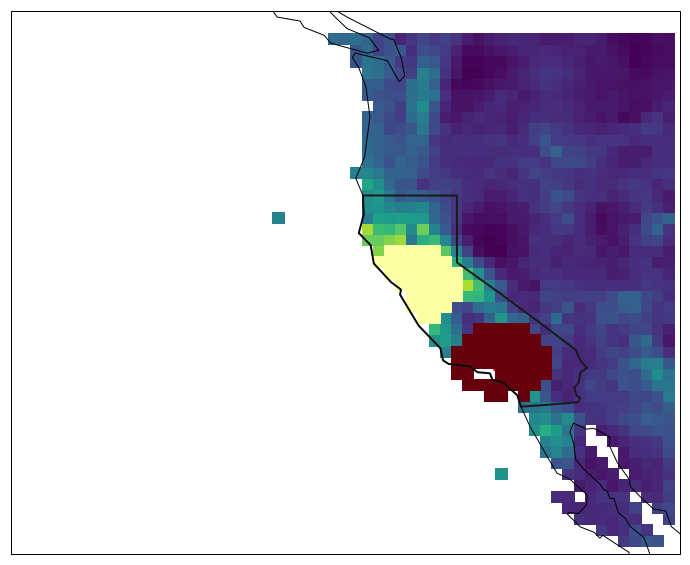

In [83]:
# sum all relevant things
fig,ax = mp.subplots(1,1,subplot_kw={'projection':cartopy.crs.PlateCarree()})
fig.set_size_inches(20,10)
#ax.set_extent([PRECT_lon.min(),PRECT_lon.max(),PRECT_lat.min(),PRECT_lat.max()])
ax.set_extent([PRECT_lon.min(),PRECT_lon.max(),PRECT_lat.min(),PRECT_lat.max()])
ax.pcolormesh(lon_cruts_subset,lat_cruts_subset,cruts_data_subset[0,:,:])
kw = {'facecolor':'None', 'lw':2, 'edgecolor':'0.1'}
state_outline = ax.add_geometries([CA_object_no_islands], crs=cartopy.crs.PlateCarree(), **kw)
state_paths = cartopy.mpl.patch.geos_to_path([CA_object_no_islands])
ax.coastlines()
ax.scatter(lon_cruts_subset[LA_lon_idx_cruts], lat_cruts_subset[LA_lat_idx_cruts], c='red')
ax.pcolormesh(lon_cruts_subset,lat_cruts_subset,distance_array_LA_2d_cruts_200km*cruts_landmask,cmap='Reds_r')
ax.pcolormesh(lon_cruts_subset,lat_cruts_subset,distance_array_SF_2d_cruts_200km*cruts_landmask,cmap='inferno_r')

# LENS

# for LA

In [66]:
bins = numpy.arange(0,1501,50)
lens_hist_LA_110km, bin_edges = numpy.histogram(area_mean_LA_lens_totals_110km,bins,density=True)
cruts_hist_LA_110km, bin_edges = numpy.histogram(area_mean_LA_cruts_totals_110km,bins,density=True)
gpcp_hist_LA_110km, bin_edges = numpy.histogram(area_mean_LA_gpcp_totals_110km,bins,density=True)

bin_centers_LA = (bin_edges[:-1] + bin_edges[1:])/2
bin_width_LA = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

In [67]:
bins = numpy.arange(0,1501,50)
lens_hist_LA_200km, bin_edges = numpy.histogram(area_mean_LA_lens_totals_200km,bins,density=True)
cruts_hist_LA_200km, bin_edges = numpy.histogram(area_mean_LA_cruts_totals_200km,bins,density=True)
gpcp_hist_LA_200km, bin_edges = numpy.histogram(area_mean_LA_gpcp_totals_200km,bins,density=True)

bin_centers_LA = (bin_edges[:-1] + bin_edges[1:])/2
bin_width_LA = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

In [68]:
bins = numpy.arange(0,1501,50)
lens_hist_LA_300km, bin_edges = numpy.histogram(area_mean_LA_lens_totals_300km,bins,density=True)
cruts_hist_LA_300km, bin_edges = numpy.histogram(area_mean_LA_cruts_totals_300km,bins,density=True)
gpcp_hist_LA_300km, bin_edges = numpy.histogram(area_mean_LA_gpcp_totals_300km,bins,density=True)

bin_centers_LA = (bin_edges[:-1] + bin_edges[1:])/2
bin_width_LA = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

# for SF

In [69]:
bins = numpy.arange(100,2001,100)
lens_hist_SF_110km, bin_edges = numpy.histogram(area_mean_SF_lens_totals_110km,bins,density=True)
cruts_hist_SF_110km, bin_edges = numpy.histogram(area_mean_SF_cruts_totals_110km,bins,density=True)
gpcp_hist_SF_110km, bin_edges = numpy.histogram(area_mean_SF_gpcp_totals_110km,bins,density=True)

bin_centers_SF = (bin_edges[:-1] + bin_edges[1:])/2
bin_width_SF = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

In [70]:
bins = numpy.arange(100,2001,100)
lens_hist_SF_200km, bin_edges = numpy.histogram(area_mean_SF_lens_totals_200km,bins,density=True)
cruts_hist_SF_200km, bin_edges = numpy.histogram(area_mean_SF_cruts_totals_200km,bins,density=True)
gpcp_hist_SF_200km, bin_edges = numpy.histogram(area_mean_SF_gpcp_totals_200km,bins,density=True)

bin_centers_SF = (bin_edges[:-1] + bin_edges[1:])/2
bin_width_SF = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

In [71]:
bins = numpy.arange(100,2001,100)
lens_hist_SF_300km, bin_edges = numpy.histogram(area_mean_SF_lens_totals_300km,bins,density=True)
cruts_hist_SF_300km, bin_edges = numpy.histogram(area_mean_SF_cruts_totals_300km,bins,density=True)
gpcp_hist_SF_300km, bin_edges = numpy.histogram(area_mean_SF_gpcp_totals_300km,bins,density=True)

bin_centers_SF = (bin_edges[:-1] + bin_edges[1:])/2
bin_width_SF = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

In [72]:
column_headers = ['LA_300km', 'SF_300km', 'LA_200km', 'SF_200km', 'LA_100km', 'SF_100km']

# plot all 300, 200, 110km radii

In [73]:
LA_list_lens = [lens_hist_LA_110km, lens_hist_LA_200km, lens_hist_LA_300km]
LA_list_cruts = [cruts_hist_LA_110km, cruts_hist_LA_200km, cruts_hist_LA_300km]
LA_list_gpcp = [gpcp_hist_LA_110km, gpcp_hist_LA_200km, gpcp_hist_LA_300km]
SF_list_lens = [lens_hist_SF_110km, lens_hist_SF_200km, lens_hist_SF_300km]
SF_list_cruts = [cruts_hist_SF_110km, cruts_hist_SF_200km, cruts_hist_SF_300km]
SF_list_gpcp = [gpcp_hist_SF_110km, gpcp_hist_SF_200km, gpcp_hist_SF_300km]

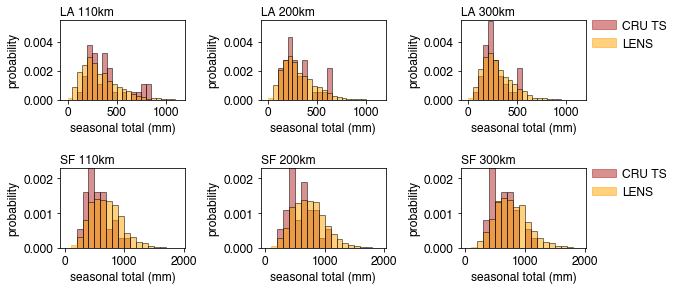

In [74]:
fontsize=12

fig,axes = mp.subplots(nrows=2,ncols=3)
fig.set_size_inches(8.5,4)

label_list = ['110km', '200km', '300km']

for ax_idx in range(3):
    #axes[0,ax_idx].bar(bin_centers_LA, LA_list_gpcp[ax_idx], align='center', width=bin_width_LA, color='dodgerblue', edgecolor='forestgreen', label='GPCP', alpha=0.5)
    axes[0,ax_idx].bar(bin_centers_LA, LA_list_cruts[ax_idx], align='center', width=bin_width_LA, color='firebrick', edgecolor='firebrick', label='CRU TS',alpha=0.5)
    axes[0,ax_idx].bar(bin_centers_LA, LA_list_lens[ax_idx], align='center', width=bin_width_LA, color='orange', edgecolor='orange', label='LENS', alpha=0.5)
    axes[0,ax_idx].text(s='LA '+label_list[ax_idx], x=0, y=1.02, transform=axes[0,ax_idx].transAxes, fontsize=fontsize, ha='left', va='bottom')
    axes[0,ax_idx].tick_params(labelsize=fontsize)
    axes[0,ax_idx].set_xlabel('seasonal total (mm)', fontsize=fontsize)
    axes[0,ax_idx].set_ylabel('probability', fontsize=fontsize)
    axes[0,ax_idx].set_xlim(-75,1200)
    axes[0,ax_idx].set_ylim(0,0.0055)
for ax_idx in range(3):
    #axes[1,ax_idx].bar(bin_centers_SF, SF_list_gpcp[ax_idx], align='center', width=bin_width_SF, color='dodgerblue', edgecolor='forestgreen', label='GPCP', alpha=0.5)
    axes[1,ax_idx].bar(bin_centers_SF, SF_list_cruts[ax_idx], align='center', width=bin_width_SF, color='firebrick', edgecolor='firebrick', label='CRU TS',alpha=0.5)
    axes[1,ax_idx].bar(bin_centers_SF, SF_list_lens[ax_idx], align='center', width=bin_width_SF, color='orange', edgecolor='orange', label='LENS', alpha=0.5)
    axes[1,ax_idx].text(s='SF '+label_list[ax_idx], x=0, y=1.02, transform=axes[1,ax_idx].transAxes, fontsize=fontsize, ha='left', va='bottom')
    axes[1,ax_idx].tick_params(labelsize=fontsize)
    axes[1,ax_idx].set_xlabel('seasonal total (mm)', fontsize=fontsize)
    axes[1,ax_idx].set_ylabel('probability', fontsize=fontsize)
    axes[1,ax_idx].set_xlim(-75,2025)
    axes[1,ax_idx].set_ylim(0,0.0023)   

handles,labels = axes[0,2].get_legend_handles_labels()
axes[0,2].legend(handles,labels,bbox_to_anchor=(1.05,1),fancybox=False,edgecolor='None',fontsize=fontsize,\
          borderaxespad=0,borderpad=0,handletextpad=0.5,loc='upper left',facecolor='None')
handles,labels = axes[1,2].get_legend_handles_labels()
axes[1,2].legend(handles,labels,bbox_to_anchor=(1.05,1),fancybox=False,edgecolor='None',fontsize=fontsize,\
          borderaxespad=0,borderpad=0,handletextpad=0.5,loc='upper left', facecolor='None')

fig.tight_layout(h_pad=3)

fig.savefig('lens_cruts_histograms_'+ys_str+'-'+ye_str+'.png', dpi=600, bbox_inches='tight', transparent=True)

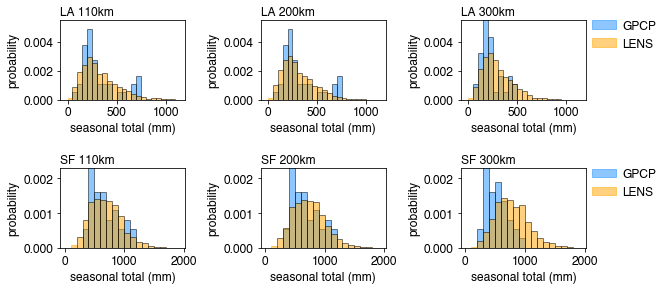

In [75]:
fontsize=12

fig,axes = mp.subplots(nrows=2,ncols=3)
fig.set_size_inches(8.5,4)

label_list = ['110km', '200km', '300km']

for ax_idx in range(3):
    axes[0,ax_idx].bar(bin_centers_LA, LA_list_gpcp[ax_idx], align='center', width=bin_width_LA, color='dodgerblue', edgecolor='dodgerblue', label='GPCP', alpha=0.5)
    #axes[0,ax_idx].bar(bin_centers_LA, LA_list_cruts[ax_idx], align='center', width=bin_width_LA, color='firebrick', edgecolor='firebrick', label='CRU TS',alpha=0.5)
    axes[0,ax_idx].bar(bin_centers_LA, LA_list_lens[ax_idx], align='center', width=bin_width_LA, color='orange', edgecolor='orange', label='LENS', alpha=0.5)
    axes[0,ax_idx].text(s='LA '+label_list[ax_idx], x=0, y=1.02, transform=axes[0,ax_idx].transAxes, fontsize=fontsize, ha='left', va='bottom')
    axes[0,ax_idx].tick_params(labelsize=fontsize)
    axes[0,ax_idx].set_xlabel('seasonal total (mm)', fontsize=fontsize)
    axes[0,ax_idx].set_ylabel('probability', fontsize=fontsize)
    axes[0,ax_idx].set_xlim(-75,1200)
    axes[0,ax_idx].set_ylim(0,0.0055)
for ax_idx in range(3):
    axes[1,ax_idx].bar(bin_centers_SF, SF_list_gpcp[ax_idx], align='center', width=bin_width_SF, color='dodgerblue', edgecolor='dodgerblue', label='GPCP', alpha=0.5)
    #axes[1,ax_idx].bar(bin_centers_SF, SF_list_cruts[ax_idx], align='center', width=bin_width_SF, color='firebrick', edgecolor='firebrick', label='CRU TS',alpha=0.5)
    axes[1,ax_idx].bar(bin_centers_SF, SF_list_lens[ax_idx], align='center', width=bin_width_SF, color='orange', edgecolor='orange', label='LENS', alpha=0.5)
    axes[1,ax_idx].text(s='SF '+label_list[ax_idx], x=0, y=1.02, transform=axes[1,ax_idx].transAxes, fontsize=fontsize, ha='left', va='bottom')
    axes[1,ax_idx].tick_params(labelsize=fontsize)
    axes[1,ax_idx].set_xlabel('seasonal total (mm)', fontsize=fontsize)
    axes[1,ax_idx].set_ylabel('probability', fontsize=fontsize)
    axes[1,ax_idx].set_xlim(-75,2025)
    axes[1,ax_idx].set_ylim(0,0.0023)   

handles,labels = axes[0,2].get_legend_handles_labels()
axes[0,2].legend(handles,labels,bbox_to_anchor=(1.05,1),fancybox=False,edgecolor='None',fontsize=fontsize,\
          borderaxespad=0,borderpad=0,handletextpad=0.5,loc='upper left',facecolor='None')
handles,labels = axes[1,2].get_legend_handles_labels()
axes[1,2].legend(handles,labels,bbox_to_anchor=(1.05,1),fancybox=False,edgecolor='None',fontsize=fontsize,\
          borderaxespad=0,borderpad=0,handletextpad=0.5,loc='upper left', facecolor='None')

fig.tight_layout(h_pad=3)

fig.savefig('lens_gpcp_histograms_'+ys_str+'-'+ye_str+'.png', dpi=600, bbox_inches='tight', transparent=True)

# Save as CSV files for D Swain

# Save only overlapping time periods

In [79]:
# save 110, 200, 300km column for GPCP, CRU TS, and LENS separately

column_headers = ['LA_300km_mm_total', 'LA_200km_mm_total', 'LA_100km_mm_total', \
                  'SF_300km_mm_total', 'SF_200km_mm_total', 'SF_100km_mm_total']

# area_mean_LA_lens_totals_300km
lens_array = numpy.column_stack(( area_mean_LA_lens_totals_110km, area_mean_LA_lens_totals_200km, area_mean_LA_lens_totals_300km ,\
                                area_mean_SF_lens_totals_110km, area_mean_SF_lens_totals_200km, area_mean_SF_lens_totals_300km ))
lens_df = pandas.DataFrame(lens_array,columns=column_headers)
lens_df.to_csv('LENS_area_mean_seasonal_totals_'+ys_str+'-'+ye_str+'.csv')

In [80]:
cruts_array = numpy.column_stack(( area_mean_LA_cruts_totals_110km, area_mean_LA_cruts_totals_200km, area_mean_LA_cruts_totals_300km ,\
                                area_mean_SF_cruts_totals_110km, area_mean_SF_cruts_totals_200km, area_mean_SF_cruts_totals_300km ))
cruts_df = pandas.DataFrame(cruts_array,columns=column_headers)
cruts_df.to_csv('CRUTS_area_mean_seasonal_totals_'+ys_str+'-'+ye_str+'.csv')

In [81]:
gpcp_array = numpy.column_stack(( area_mean_LA_gpcp_totals_110km, area_mean_LA_gpcp_totals_200km, area_mean_LA_gpcp_totals_300km ,\
                                area_mean_SF_gpcp_totals_110km, area_mean_SF_gpcp_totals_200km, area_mean_SF_gpcp_totals_300km ))
gpcp_df = pandas.DataFrame(gpcp_array,columns=column_headers)
gpcp_df.to_csv('GPCP_area_mean_seasonal_totals_'+ys_str+'-'+ye_str+'.csv')

# Save CRU TS seasonal totals as netcdf file